In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#input data
online_food = pd.read_csv('onlinefoods.csv')

In [25]:
online_food = online_food.drop(columns=['Unnamed: 12'])

In [26]:
online_food.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [27]:
online_food.tail()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive
387,23,Male,Single,Student,No Income,Post Graduate,5,12.8988,77.5764,560078,Yes,Positive


In [28]:
online_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 36.5+ KB


In [29]:
online_food.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,388.0,24.628866,2.975593,18.0000,23.000000,24.0000,26.000000,33.0000
Family size,388.0,3.280928,1.351025,1.0000,2.000000,3.0000,4.000000,6.0000
latitude,388.0,12.972058,0.044489,12.8652,12.936900,12.9770,12.997025,13.1020
longitude,388.0,77.600160,0.051354,77.4842,77.565275,77.5921,77.630900,77.7582
Pin code,388.0,560040.113402,31.399609,560001.0000,560010.750000,560033.5000,560068.000000,560109.0000


In [30]:
online_food.describe(include='object')

,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Output,Feedback
count,388,388,388,388,388,388,388
unique,2,3,4,5,5,2,2
top,Male,Single,Student,No Income,Graduate,Yes,Positive
freq,222,268,207,187,177,301,317


In [8]:
counts=online_food.Output.value_counts()
counts

Output
Yes    301
No      87
Name: count, dtype: int64

<Axes: title={'center': 'Yes vs No'}, xlabel='Output', ylabel='count'>

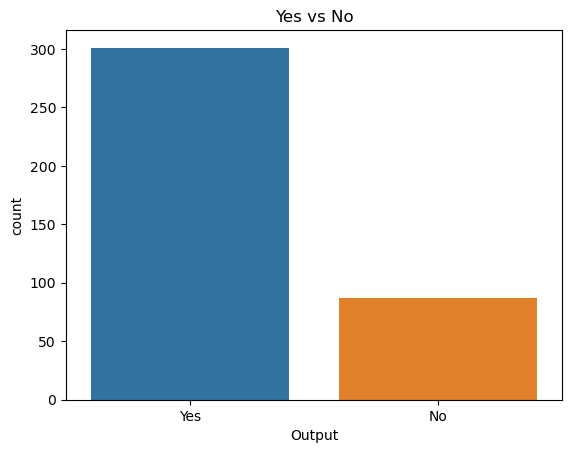

In [9]:
plt.title('Yes vs No')
sns.countplot(x='Output', data=online_food)

c:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


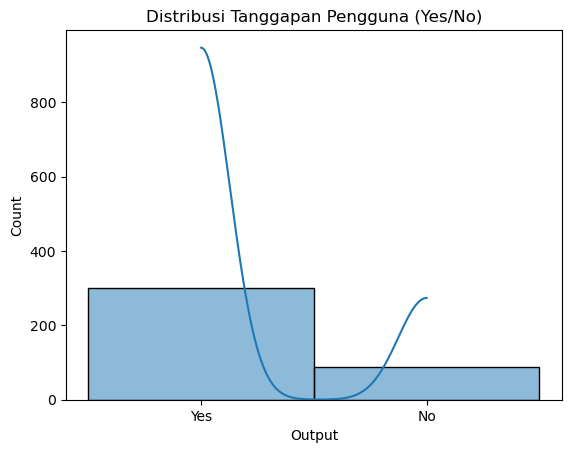

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribusi usia
sns.histplot(online_food['Output'], kde=True)
plt.title('Distribusi Tanggapan Pengguna (Yes/No)')
plt.show()

NUMERIC

In [12]:
online_food.isna().sum()

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64

In [13]:
numerical_features = ['Age', 'Family size', 'latitude', 'longitude', 'Pin code']

In [14]:
data_scaled = online_food.copy()

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [16]:
standard_scaler = StandardScaler()
data_scaled[numerical_features] = standard_scaler.fit_transform(online_food[numerical_features])

In [17]:
print("\nHasil Standard Scaling:")
print(data_scaled[numerical_features].head())


Hasil Standard Scaling:
        Age  Family size  latitude  longitude  Pin code
0 -1.557620     0.532929  0.102224  -0.016759 -1.247274
1 -0.211614    -0.208205  0.111227  -0.445712 -0.992164
2 -0.884617    -0.208205 -0.381663   1.153112 -0.737055
3 -0.884617     2.015198 -0.557212  -0.751828 -0.673278
4 -0.884617     0.532929  0.291278  -0.913660 -0.960276


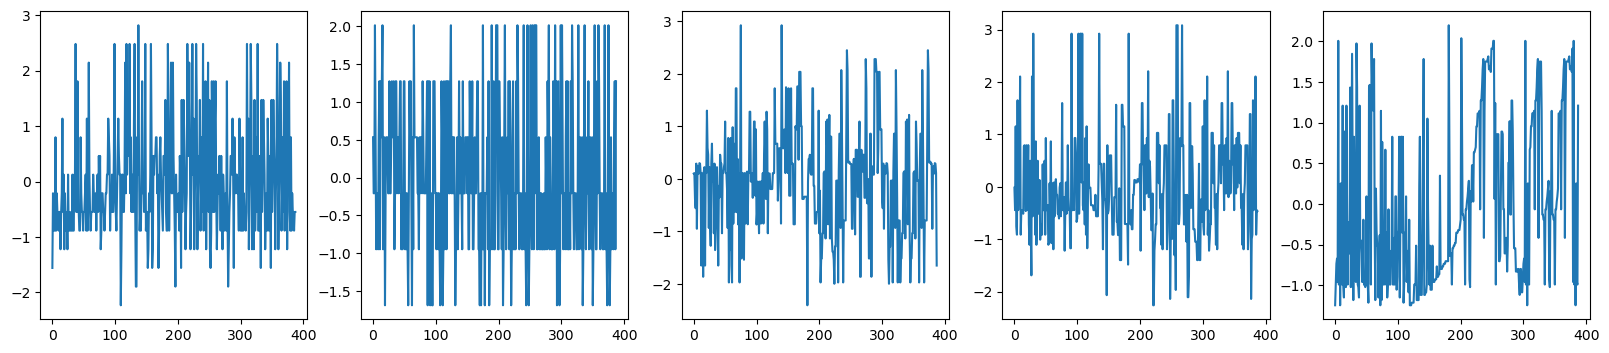

In [18]:
fig,axs = plt.subplots(1,5,figsize=(20,4))
for x,y in enumerate(data_scaled[numerical_features]):
    axs[x].plot(data_scaled[numerical_features][y])

KATEGORIKAL

In [19]:
onlinefood_new = online_food.select_dtypes(include=['object']).copy()
nRows, nCols = onlinefood_new.shape
for myIndex in range(0,nCols):
    headerName = onlinefood_new.columns[myIndex]
    onlinefood_new[headerName] = onlinefood_new[headerName].astype("category")
    onlinefood_new[headerName] = onlinefood_new[headerName].cat.codes
    online_food[headerName] = onlinefood_new[headerName]
onlinefood_numeric = online_food
onlinefood_numeric.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,1,1,1
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,1,1,1
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,1,0,1
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,1,1,1
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,1,1,1


svm

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [168]:
online_foodd = 'onlinefoods.csv'
data = pd.read_csv('onlinefoods.csv')

In [169]:
data = data.drop(columns=['Unnamed: 12'])

In [170]:
categorical_columns = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 
                       'Educational Qualifications', 'Feedback']

In [171]:
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [172]:
features = data.drop(columns=['Output'])
target = LabelEncoder().fit_transform(data['Output'])

In [173]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

In [175]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [176]:
y_pred = svm_model.predict(X_test)

In [177]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [178]:
print(f'Test accuracy: {accuracy}')
print('Classification report:')
print(report)

Test accuracy: 0.8589743589743589
Classification report:
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.91      0.92      0.92        66

    accuracy                           0.86        78
   macro avg       0.73      0.71      0.72        78
weighted avg       0.85      0.86      0.86        78



Hypertunning SVM

In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [180]:
# Drop any unnecessary columns (e.g., 'Unnamed: 12' if it exists)
if 'Unnamed: 12' in data.columns:
    data = data.drop(columns=['Unnamed: 12'])

In [181]:
# Separate features and target variable
X = data.drop(columns=['Output'])
y = data['Output']

In [182]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [184]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

In [185]:
# Initialize GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=5, n_jobs=-1)

In [186]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [187]:
# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Best Score: 0.8451612903225806


In [188]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_scaled, y_test)
print("Test Score:", test_score)

Test Score: 0.8461538461538461


c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [189]:
# Memprediksi data uji menggunakan model terbaik
y_pred = best_model.predict(X_test)

In [190]:
# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [191]:
print(f'Test accuracy: {accuracy}')
print('Classification report:')
print(report)

Test accuracy: 0.8717948717948718
Classification report:
              precision    recall  f1-score   support

          No       0.60      0.50      0.55        12
         Yes       0.91      0.94      0.93        66

    accuracy                           0.87        78
   macro avg       0.76      0.72      0.74        78
weighted avg       0.86      0.87      0.87        78



SVM Plot

In [239]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [231]:
# Encode target variable
label_encoder = LabelEncoder()
online_food['Output'] = label_encoder.fit_transform(online_food['Output'])

In [232]:
# Encode categorical features
features = ['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Family size']
for column in features:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

In [233]:
# Select features for visualization
X = data[['Age', 'Monthly Income']].values
y = data['Output'].values

In [234]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [235]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [236]:
# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [237]:
# Create a mesh to plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [238]:
# Plot decision boundary
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

In [245]:
plt.contourf(xx, yy, Z, cmap=plt.cm('twilight'), alpha=0.8)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm('twilight'), edgecolors='k')
plt.xlabel('Age (standardized)')
plt.ylabel('Monthly Income (standardized)')
plt.title('SVM Decision Boundary')
plt.show()

TypeError: 'module' object is not callable

In [226]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [227]:
# Membuat objek SVM
svm_model = SVC(kernel='linear')

# Melatih model
svm_model.fit(X, y)

SVC(kernel='linear')

In [228]:
# Bobot (w) dan bias (b)
w = svm_model.coef_[0]
b = svm_model.intercept_[0]

InvalidIndexError: (slice(None, None, None), 0)

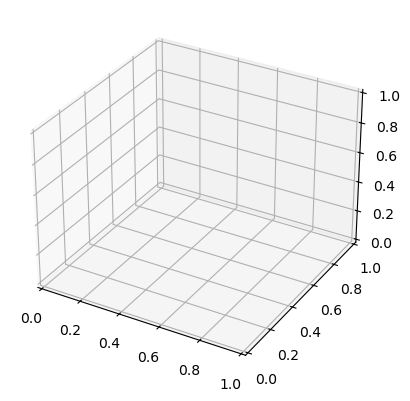

In [229]:
# Plot data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap=plt.cm.coolwarm)

# Hyperplane
x1 = np.linspace(1, 4, 10)
x2 = np.linspace(2, 5, 10)
x1, x2 = np.meshgrid(x1, x2)
x3 = (-w[0] * x1 - w[1] * x2 - b) / w[2]
ax.plot_surface(x1, x2, x3, alpha=0.5)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('SVM dengan 3 Fitur')
plt.show()

In [225]:
plt.scatter(X1[:,0], X1[:,1], color='blue', label='Kelas 1')
plt.scatter(X2[:,0], X2[:,1], color='red', label='Kelas 2')

NameError: name 'X1' is not defined

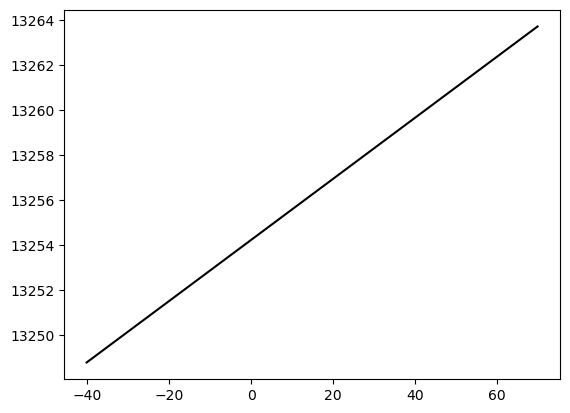

In [222]:
x_hyperplane = np.linspace(x_min, x_max, 100)
y_hyperplane = (-w[0] * x_hyperplane - b) / w[1]
plt.plot(x_hyperplane, y_hyperplane, 'k-', label='Hyperplane')

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

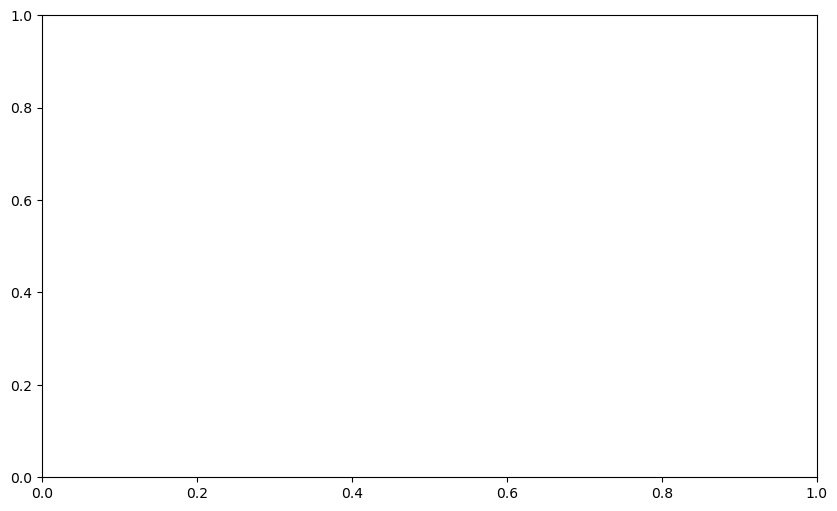

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Mereduksi dimensi menjadi 2D untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Bagi data menjadi training dan testing set
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Membuat model SVM
svm_model_pca = SVC(kernel='linear')

# Melatih model
svm_model_pca.fit(X_train_pca, y_train_pca)

# Membuat mesh grid untuk plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prediksi pada mesh grid
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary dan poin data menggunakan matplotlib
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary after PCA')
plt.show()

KNN

In [41]:
# Membagi dataset menjadi training dan testing
X = online_food.drop(columns=['Output'])
y = online_food['Output']

In [42]:
# panggil fungsi klasifikasi KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [43]:
# Dataset yang ada akan dibagi menjadi 2 bagian yaitu x test dan x train untuk variabel independen, y test dan y train untuk variabel dependen
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [44]:
# Membuat dan melatih model KNN
model_knn = knn.fit(X_train, y_train)

In [45]:
# Memprediksi dengan model KNN
y_pred_knn = knn.predict(X_test)

In [46]:
# Evaluasi model KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_score_knn = f1_score(y_test, y_pred_knn)

In [47]:
print(f'KNN - Accuracy: {accuracy_knn}')
print(f'KNN-Precision: {precision_knn}')
print(f'KNN-Recall: {recall_knn}')
print(f'KNN-F1 Score: {f1_score_knn}')

KNN - Accuracy: 0.782051282051282
KNN-Precision: 0.875
KNN-Recall: 0.8615384615384616
KNN-F1 Score: 0.8682170542635659


Visualisasi KNN

In [48]:
from sklearn import metrics
# try K=1 through K=4 and record testing accuracy
k_range = range(1, 5)

In [49]:
# We can create Python dictionary using [] or dict()
scores = []

In [50]:
# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8333333333333334, 0.7692307692307693, 0.8205128205128205, 0.782051282051282]


Text(0, 0.5, 'Testing Accuracy')

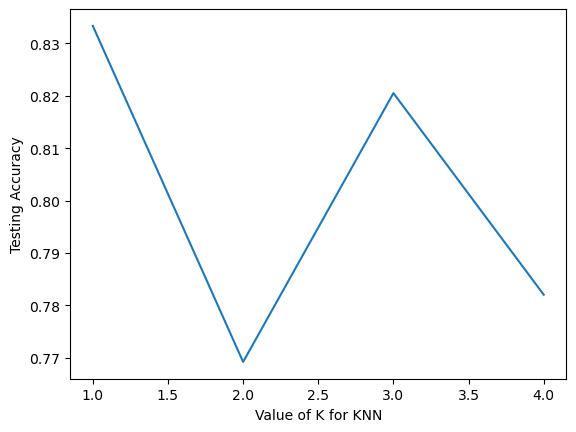

In [51]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Hyperparameter Tunning KNN

In [52]:
# impor modul yang digunakan
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [53]:
# buat dataset untuk contoh
X, y = make_classification(n_samples=78, n_features=13, n_classes=2, random_state=44)

In [59]:
# definisikan model
model = RandomForestClassifier()

In [58]:
# buat dictionary dari hyperparameter yang ingin diuji
param_grid = {
    'n_estimators': [15, 30, 49, 70],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 7, 13, 15]
}

In [56]:
# buat objek GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [60]:
# Melakukan penyetelan hyperparameter menggunakan data
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20, 50],
                         'min_samples_split': [2, 5, 7, 13, 15],
                         'n_estimators': [15, 30, 49, 70]})

In [61]:
# Menampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'max_depth': 20, 'min_samples_split': 13, 'n_estimators': 70}


In [62]:
# impor modul yang digunakan
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [63]:
# cross_val_score menangani pemisahan X dan y ke dalam 10 lipatan
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')

In [65]:
# Menampilkan skor validasi terbaik
print("Cross validation score:", scores.mean())

Cross validation score: 0.6803571428571429


Naive Bayes

In [134]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [139]:
# Membaca data dari file CSV
df = pd.read_csv('onlinefoods.csv')

In [140]:
# Menampilkan informasi tentang data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [141]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(columns=['Unnamed: 12'])

In [142]:
# Memisahkan fitur dan target
X = df.drop(columns=['Output'])
y = df['Output']

In [143]:
# Mengkodekan fitur kategorikal menjadi numerik
le = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = le.fit_transform(X[column])

In [144]:
# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [145]:
# Membuat model Naive Bayes
model = GaussianNB()

In [146]:
# Melatih model
model.fit(X_train, y_train)

GaussianNB()

In [147]:
# Memprediksi data uji
y_pred = model.predict(X_test)

In [148]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [149]:
print(f"Akurasi: {accuracy * 100:.2f}%")
print("Laporan Klasifikasi:\n", report)

Akurasi: 85.47%
Laporan Klasifikasi:
               precision    recall  f1-score   support

          No       0.60      0.68      0.64        22
         Yes       0.92      0.89      0.91        95

    accuracy                           0.85       117
   macro avg       0.76      0.79      0.77       117
weighted avg       0.86      0.85      0.86       117



Naive Bayes Hyper Tunning

In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



In [151]:
# Definisi parameter grid untuk hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}

In [152]:
# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

In [153]:
# Melatih model menggunakan Grid Search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [154]:
# Menampilkan hasil terbaik
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'var_smoothing': 1e-09}
Best score: 0.8596632996632996


In [155]:
# Memprediksi data uji menggunakan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [156]:
# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [157]:
print(f"Akurasi: {accuracy * 100:.2f}%")
print("Laporan Klasifikasi:\n", report)

Akurasi: 85.47%
Laporan Klasifikasi:
               precision    recall  f1-score   support

          No       0.60      0.68      0.64        22
         Yes       0.92      0.89      0.91        95

    accuracy                           0.85       117
   macro avg       0.76      0.79      0.77       117
weighted avg       0.86      0.85      0.86       117



Plot Naive Bayes

In [158]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
# Memprediksi data uji menggunakan model terbaik
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

In [160]:
# Evaluasi model terbaik
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [161]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [162]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='Yes')
roc_auc = auc(fpr, tpr)

In [163]:
# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

Text(50.722222222222214, 0.5, 'Actual')

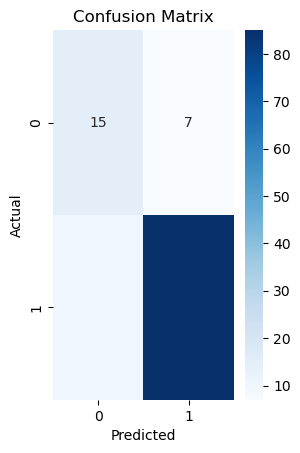

In [164]:
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

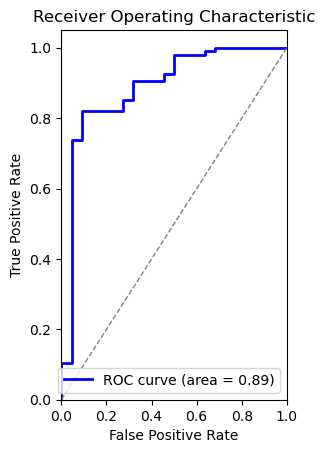

In [165]:
# Visualisasi ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

In [166]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

visualisasi

In [ ]:
# Memanggil library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Menggunakan K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Menggunakan SVM Classifier
svm_model = SVC(kernel='linear')  # Linear Kernel
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Menggunakan Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Mencetak Akurasi setiap model
print("Accuracy K-Nearest Neighbors:", accuracy_knn)
print("Accuracy SVM:", accuracy_svm)
print("Accuracy Naive Bayes:", accuracy_nb)

# Visualisasi akurasi menggunakan diagram garis
models = ['K-Nearest Neighbors', 'SVM', 'Naive Bayes']
accuracies = [accuracy_knn, accuracy_svm, accuracy_nb]

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classification Models')
plt.grid(True)
plt.show()